# Exploring the Dataset

## The following code was used to understand the data downloaded from PEW Research Center

### The Process
- Data was read into a pandas dataframe from a csv file
- Dropped variables that would not be used in analysis
- Filtered Respondents based on criteria:
    - Took less than 5 minutes to respond to survey
    - Refused to answer a question

### The Results
- A clean dataset to work with for the remainder of the project
        
## Work Shown Below

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

### Reading the Data

In [3]:
total_data = pd.read_csv('../data/2017 Pew Research Center Science and News Survey/Segmentation_data.csv', index_col= 'CaseID')

### Dropping Data
- Dropping all open ended data for now, it won't go in to the segmentation. 
    - Have the text data 
- Dropping tm_start, tm_finish
- Dropping XSpanish (did they or did take survey in spanish or english
- Dropping PPMSACAT, PPTO1_Col.... presence of children in the HH
- Dropping DOV Form (which openended were they shown) (WILL NEED IF WE USE OPEN ENDED)

In [4]:
dropped_data = total_data.drop(labels = ['weight', 'HOBBY2_1', 'HOBBY2_2', 'HOBBY2_3',
                            'GREATPAST_OE1', 'GREATPAST_OE2', 'GREATPAST_OE3', 
                            'GREATFUTURE_OE1', 'GREATFUTURE_OE2', 'GREATFUTURE_OE3',
                           'FAKE_OE1','FAKE_OE2', 'FAKE_OE3',
                           'DISAG_OE1', 'DISAG_OE2', 'DISAG_OE3',
                           'DECIS_OE1', 'DECIS_OE2', 'DECIS_OE3',
                           'tm_start', 'tm_finish',
                           'XSPANISH', 'PPT01_COL', 'PPT25_COL', 'PPT612_COL', 'PPT1317_COL', 'PPT18OV_COL', 
                           'DOV_FORM'], axis = 1)

In [5]:
dropped_data.iloc[:,0:100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 6 to 4313
Data columns (total 100 columns):
duration           4024 non-null int64
LIFE               4024 non-null int64
MUSEUM_a           4024 non-null int64
MUSEUM_b           4024 non-null int64
MUSEUM_c           4024 non-null int64
MUSEUM_d           4024 non-null int64
MUSEUM_e           4024 non-null int64
MUSEUM_f           4024 non-null int64
MUSEUM_g           4024 non-null int64
MUSEUM_h           4024 non-null int64
MUSEUM_i           4024 non-null int64
MUSEUM_j           4024 non-null int64
MUSEUM_Refused     4024 non-null int64
TOPICINT_a         4024 non-null int64
TOPICINT_b         4024 non-null int64
TOPICINT_c         4024 non-null int64
TOPICINT_d         4024 non-null int64
TOPICINT_e         4024 non-null int64
TOPICINT_f         4024 non-null int64
SCIOFTEN           4024 non-null int64
TOPICS1            4024 non-null int64
TOPICS2_a          4024 non-null int64
TOPICS2_b          4024 non-null i

In [6]:
dropped_data.iloc[:,100:200].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 6 to 4313
Data columns (total 95 columns):
SNSPOST_j             4024 non-null object
SNSPOST_Refused       4024 non-null object
SNSCHECK1_a           4024 non-null object
SNSCHECK1_b           4024 non-null object
SNSCHECK1_c           4024 non-null object
SNSCHECK1_d           4024 non-null object
SNSCHECK1_e           4024 non-null object
SNSCHECK1_f           4024 non-null object
SNSCHECK1_Refused     4024 non-null object
SNSCHECK2_a           4024 non-null object
SNSCHECK2_b           4024 non-null object
SNSCHECK2_c           4024 non-null object
SNSCHECK2_d           4024 non-null object
SNSCHECK2_e           4024 non-null object
SNSCHECK2_f           4024 non-null object
SNSCHECK2_Refused     4024 non-null object
SNSNEW                4024 non-null object
SNSTRUST              4024 non-null object
PROBSET_a             4024 non-null int64
PROBSET_b             4024 non-null int64
PROBSET_c             4024 non-null

WE NOW HAVE 200 VARIABLES

### Data Quality & Filtering respondents
- Filter out respondents who are outliers in how long it took them to take the survey (realistically could people take the survey in < 5 minutes?). Not capping the higher end since it is possible someone left their computer open, walked away and came back
> Out of the whole sample it took 85 people <5 minutes. I am removing them from the data

- Data is weighted based on the methodology doc

In [7]:
dropped_data['duration'].describe()

count     4024.000000
mean       344.999751
std       1597.232848
min          2.000000
25%         11.000000
50%         17.000000
75%         27.000000
max      16268.000000
Name: duration, dtype: float64

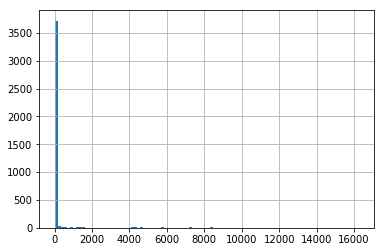

In [8]:
dropped_data['duration'].hist(bins = 100)
plt.show()

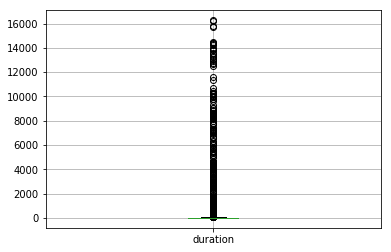

In [9]:
dropped_data.boxplot(column = 'duration')
plt.show()

In [10]:
filtered_data = dropped_data[dropped_data['duration'] >= 5]

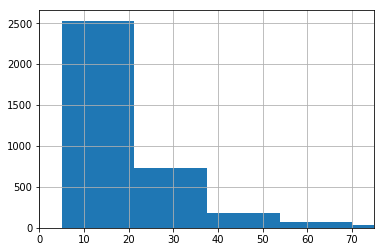

In [11]:
filtered_data['duration'].hist(bins = 1000)
plt.xlim(xmin = 0, xmax = 75)
plt.show()

In [12]:
filtered_data_drop = filtered_data.drop(labels= 'duration', axis = 1)

#### After exploring the data, there are a few (max 119) '-1' values, which I take as respondents who didn't answer the quesiton. I will remove these respondents when building the segmentation

In [17]:
filtered_data_drop[filtered_data_drop['TOPICS1'] == -1].head()

,LIFE,MUSEUM_a,MUSEUM_b,MUSEUM_c,MUSEUM_d,MUSEUM_e,MUSEUM_f,MUSEUM_g,MUSEUM_h,MUSEUM_i,...,PPHHSIZE,PPHOUSE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,ppreg9,PPRENT,PPWORK,AGE
CaseID,,,,,,,,,,,,,,,,,,,,,
102,1,0,0,0,0,0,0,0,0,0,...,6,1,7,1,1,3,5,2,4,33
207,1,0,0,0,0,0,0,0,0,0,...,3,1,18,5,1,2,3,1,1,29
209,1,0,0,0,0,0,0,0,0,0,...,6,1,13,5,1,1,2,1,1,18
267,2,0,0,0,1,1,1,1,1,0,...,1,1,17,2,1,3,7,1,5,68
299,1,1,0,0,0,0,0,0,0,0,...,8,3,6,4,1,4,9,2,2,53


In [18]:
filtered_data_drop.replace(-1, np.NaN, inplace = True)

In [19]:
filtered_data_drop.dropna(inplace = True)